In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*- #

# ------------------------------------------------------------------------------
#
#   Copyright (C) 2022 Concordia NAVlab. All rights reserved.
#
#   @Filename: draw_trajectory.py
#
#   @Author: Shun Li
#
#   @Date: 2022-01-13
#
#   @Email: 2015097272@qq.com
#
#   @Description:
#
# ------------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
df_real = pd.read_csv("/home/ls/m300_trajectory/m300_local_pos.csv")
df_ref = pd.read_csv("/home/ls/m300_trajectory/m300_ref_Local_path.csv")

In [3]:
east_real = df_real["E"].to_numpy()
north_real = df_real["N"].to_numpy()
up_real = df_real["U"].to_numpy()

In [4]:
x_ref = df_ref["x"].to_numpy()
y_ref = df_ref["y"].to_numpy()
z_ref = df_ref["z"].to_numpy()

In [5]:
print(type(east_real))
print(east_real.shape)

<class 'numpy.ndarray'>
(3425,)


In [6]:
r = np.abs(east_real)/np.abs(east_real).max()
g = np.abs(north_real)/np.abs(north_real).max()
b = np.abs(up_real)/np.abs(up_real).max()
rgb = np.concatenate([r.reshape([-1,1]),g.reshape([-1,1]),b.reshape([-1,1])], axis=1)
print(rgb.shape)

(3425, 3)


In [9]:
font1 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 18,
}
font2 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 18,
}


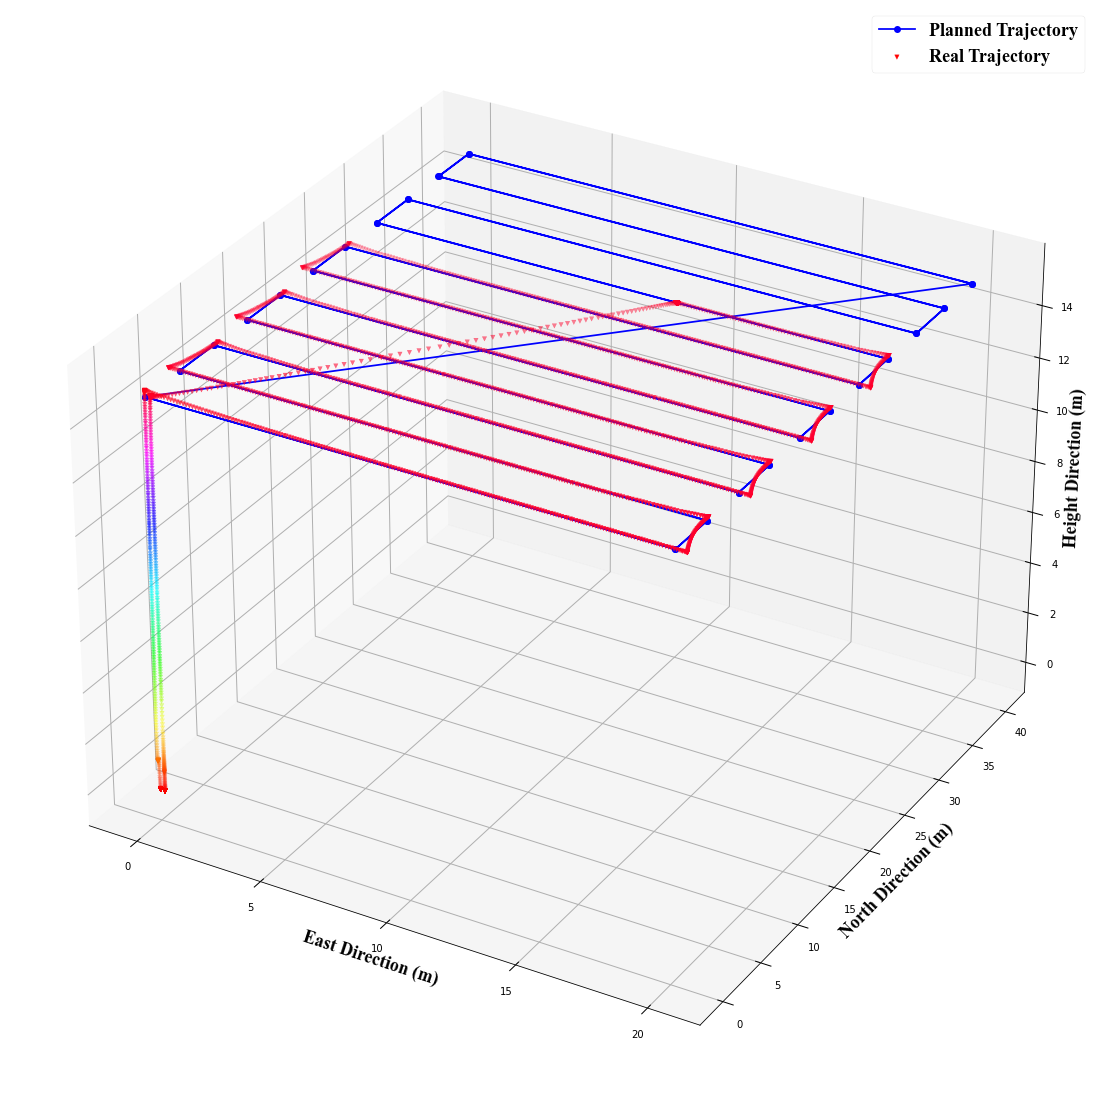

In [10]:
style.use('seaborn-notebook')

fig = plt.figure(figsize=[40,20])
ax = fig.gca(projection='3d')

# set figure information
# ax.set_title("M300 drone planned and real trajectory", fontsize=17)
ax.set_xlabel("East Direction (m)", font1)
ax.set_ylabel("North Direction (m)", font1)
ax.set_zlabel("Height Direction (m)", font1)

# draw the figure, the color is r = read
p1 = ax.plot(y_ref, x_ref, z_ref, c="blue", label='Planned Trajectory', marker='o')
p2 = ax.scatter3D(east_real, north_real, up_real, marker = "v",
                  label='Real Trajectory', c=np.abs(up_real), cmap="hsv")
ax.legend( prop=font2)

# fig.colorbar(p2,label="Height")

plt.show()
fig.savefig('m300.svg')